# Análise Fundamental de Preços de Ações com Python

## Bibliotecas importadas

In [1]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

## Obtendo informações gerais

Dado o símbolo _ticker_ identificador, o código seguinte retorna um cicionário python contendo desde informações gerais até indicadores financeiros da companhia que se deseja analisar.

In [3]:
yf.Ticker('AAPL').info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [2]:
yf.Ticker('MGLU3.SA').info

{'zip': '14403-471',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 40000,
 'longBusinessSummary': 'Magazine Luiza S.A. engages in the retail sale of consumer goods. It operates through Retail, Financial Operations, Insurance Operations, and Other Services segments. The company sells technology products, appliances, electronics, telephony, furniture, gifts, and toys. It also grants credit and provides extended warranties for its products. In addition, the company is involved in the provision of consumer financing and consortium services for the purchase of vehicles, motorcycles, home appliances, and real estate properties; and e-commerce of perfumes, cosmetics, sports, and fashion products. Further, it provides integration, logistics, and technological solutions; and manages relation between merchants and marketplaces. As of December 31, 2019, the company owned 1,113 stores and 17 distribution centers. The company was founded in 1957 and is headquartered in Franca, Brazil. Magaz

In [10]:
yf.Ticker('IBM').info

{'zip': '10504',
 'sector': 'Technology',
 'longBusinessSummary': "International Business Machines Corporation provides integrated solutions and services worldwide. Its Cloud & Cognitive Software segment offers software for vertical and domain-specific solutions in various application areas; and customer information control system and storage, and analytics and integration software solutions to support client mission on-premise workloads in banking, airline, and retail industries. It offers middleware and data platform software, including Red Hat that enables the operation of clients' hybrid multi-cloud environments; and Cloud Paks, WebSphere distributed, and analytics platform software, such as DB2 distributed, information integration, and enterprise content management, as well as IoT, Blockchain and AI/Watson platforms. The company's Global Business Services segment offers business consulting services; system integration, application management, maintenance, and support services for 

## Análise comparativa de algumas compnhias

In [4]:
tickers = ['AAPL', 'MSFT', 'IBM']

In [5]:
infos = []

for ticker in tickers:
    infos.append(yf.Ticker(ticker).info)

Visualização do resultado:

In [11]:
infos

[{'zip': '95014',
  'sector': 'Technology',
  'fullTimeEmployees': 100000,
  'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience

### Análise Fundamental

In [9]:
fundamentals = [
    'dividendYield', # Rendimento de dividendos
    'marketCap', # Valor de Mercado
    'beta', # Coeficiente beta
    'forwardPE', # Relação preço lucro
]

A seguir, cria-se um _dataframe_ contendo os dados necessários à análise fundamental a partir da lista de informações gerais 'infos':

In [13]:
df = pd.DataFrame(infos)
df = df.set_index('symbol')
df 

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,95014,Technology,100000.0,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,...,116.210000,0,False,0.0052,800,173.0800,168.64,167.76,https://logo.clearbit.com/apple.com,3.3429
MSFT,98052-6399,Technology,181000.0,"Microsoft Corporation develops, licenses, and ...",Redmond,425 882 8080,WA,United States,[],https://www.microsoft.com,...,224.260000,0,False,0.0084,1000,304.2900,295.04,293.80,https://logo.clearbit.com/microsoft.com,2.4571
IBM,10504,Technology,NaN,International Business Machines Corporation pr...,Armonk,914 499 1900,NY,United States,[],https://www.ibm.com,...,113.173996,0,False,0.0494,1300,134.7099,132.69,132.45,https://logo.clearbit.com/ibm.com,1.2734


In [16]:
df[df.columns[df.columns.isin(fundamentals)]]

,beta,forwardPE,marketCap,dividendYield
symbol,,,,
AAPL,1.187468,25.668188,2752103579648,0.0052
MSFT,0.888612,27.445581,2211876438016,0.0084
IBM,1.089010,12.553453,118932701184,0.0494


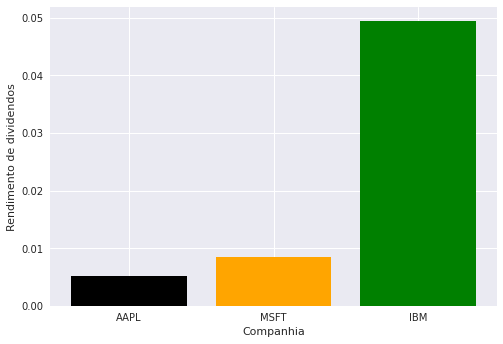

In [20]:
plt.bar(df.index, df.dividendYield, color=['k', 'orange', 'g'])
plt.ylabel('Rendimento de dividendos')
plt.xlabel('Companhia')
plt.show()

In [21]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
df2

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.02%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.60%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.96%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,3.74%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.53%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.03%
8,Coca-Cola,NYSE,KO,Soft Drink,1987-03-12,Also 1932-05-26 to 1935-11-20,1.15%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,2.65%


In [25]:
tickers = df2.Symbol.to_list()

In [26]:
infos = []

for ticker in tickers:
    infos.append(yf.Ticker(ticker).info)

In [28]:
df3 = pd.DataFrame(infos)
df3 = df3.set_index('symbol')
df3

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax,address2
symbol,,,,,,,,,,,,,,,,,,,,,
MMM,55144-1000,Industrials,95000.0,3M Company operates as a diversified technolog...,Saint Paul,651 733 1110,MN,United States,[],https://www.3m.com,...,False,0.0374,1000,161.6000,159.54,159.6400,https://logo.clearbit.com/3m.com,1.8137,NaN,NaN
AXP,10285,Financial Services,NaN,"American Express Company, together with its su...",New York,212 640 2000,NY,United States,[],https://www.americanexpress.com,...,False,0.0090,800,197.2000,191.81,191.7800,https://logo.clearbit.com/americanexpress.com,0.8946,NaN,NaN
AMGN,91320-1799,Healthcare,NaN,"Amgen Inc. discovers, develops, manufactures, ...",Thousand Oaks,805 447 1000,CA,United States,[],https://www.amgen.com,...,False,0.0340,1000,231.4700,228.20,227.0400,https://logo.clearbit.com/amgen.com,1.4229,805 447 1010,NaN
AAPL,95014,Technology,100000.0,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,...,False,0.0052,800,173.0800,168.64,167.8200,https://logo.clearbit.com/apple.com,3.3429,NaN,NaN
BA,60606-1596,Industrials,142000.0,"The Boeing Company, together with its subsidia...",Chicago,312 544 2000,IL,United States,[],https://www.boeing.com,...,False,NaN,800,221.4200,212.30,213.4991,https://logo.clearbit.com/boeing.com,6.5305,NaN,NaN
CAT,60015,Industrials,NaN,Caterpillar Inc. manufactures and sells constr...,Deerfield,224-551-4000,IL,United States,[],https://www.caterpillar.com,...,False,0.0221,900,204.6500,201.24,200.6400,https://logo.clearbit.com/caterpillar.com,1.6245,NaN,Suite 100
CVX,94583-2324,Energy,NaN,"Chevron Corporation, through its subsidiaries,...",San Ramon,925 842 1000,CA,United States,[],https://www.chevron.com,...,False,0.0409,900,139.4400,138.81,138.0100,https://logo.clearbit.com/chevron.com,NaN,NaN,NaN
CSCO,95134,Technology,79500.0,"Cisco Systems, Inc. designs, manufactures, and...",San Jose,408 526 4000,CA,United States,[],https://www.cisco.com,...,False,0.0275,1100,55.0900,53.90,53.3000,https://logo.clearbit.com/cisco.com,2.9277,NaN,NaN
KO,30313,Consumer Defensive,NaN,"The Coca-Cola Company, a beverage company, man...",Atlanta,404 676 2121,GA,United States,[],https://www.coca-colacompany.com,...,False,0.0279,2200,61.9800,60.29,60.0500,https://logo.clearbit.com/coca-colacompany.com,2.7055,NaN,NaN


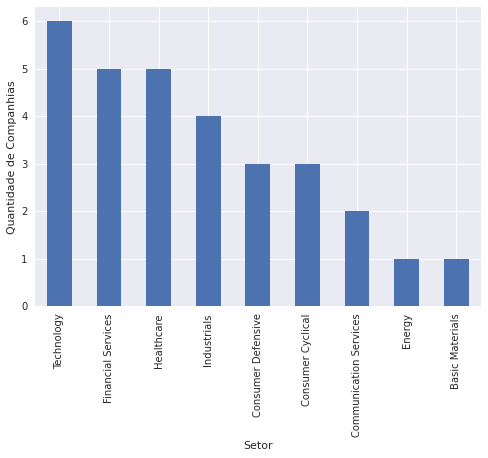

In [34]:
ax = df3.sector.value_counts().plot.bar()
ax.set_xlabel('Setor')
ax.set_ylabel('Quantidade de Companhias')
plt.show()

Companhias com maior rendimento de dividendos:

In [35]:
df3['dividendYield'].nlargest(5)

symbol
IBM    0.0494
VZ     0.0480
DOW    0.0459
CVX    0.0409
WBA    0.0392
Name: dividendYield, dtype: float64

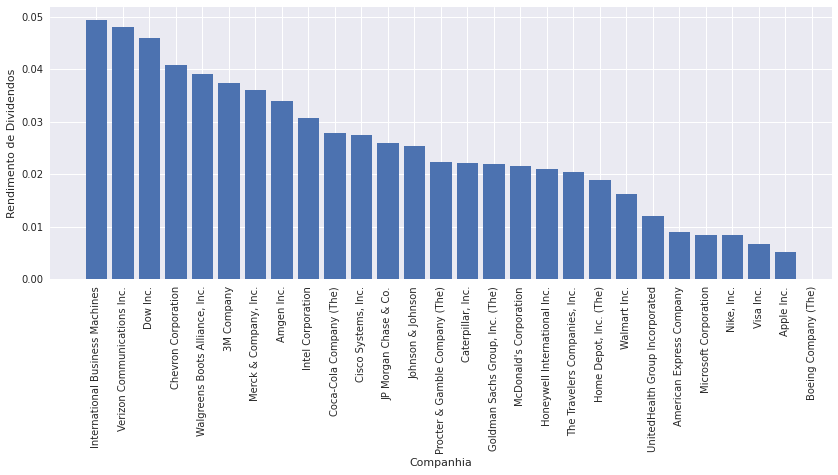

In [44]:
x = df3.sort_values(by=['dividendYield'], ascending=False)
plt.figure(figsize=(14, 5))
plt.bar(x['shortName'], x['dividendYield'])
plt.xlabel('Companhia')
plt.ylabel('Rendimento de Dividendos')
plt.xticks(rotation=90)

plt.show()
